In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('train.csv')
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
data["Postal Code"]=data["Postal Code"].fillna(5402)

In [7]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [8]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d/%m/%Y")
data['Month Name'] = data['Order Date'].dt.strftime('%B')

In [10]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month Name
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,9797,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January
9797,9798,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,January
9798,9799,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January


In [11]:
newdata = data.copy()

In [12]:
newdata['Month Name'] = newdata['Month Name'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

In [13]:
newdata = newdata.sort_values(by='Sales',ascending=False)

In [14]:
newdata['Category'].unique()

array(['Technology', 'Office Supplies', 'Furniture'], dtype=object)

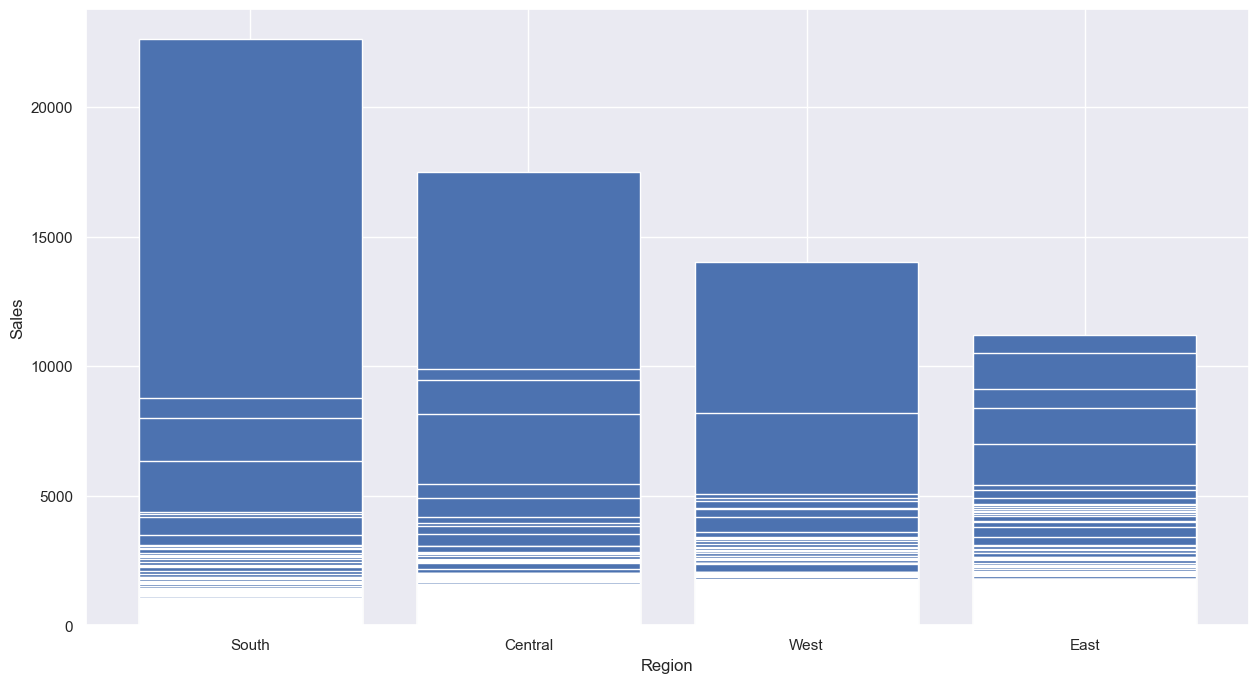

In [15]:
plt.figure(figsize=(15,8))
plt.bar(newdata['Region'],newdata['Sales'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [16]:
newdata['City'].unique()

array(['Jacksonville', 'Lafayette', 'Seattle', 'New York City', 'Newark',
       'Detroit', 'Minneapolis', 'Lakewood', 'Arlington', 'Philadelphia',
       'San Francisco', 'San Antonio', 'Burlington', 'Atlanta', 'Jackson',
       'Providence', 'Sacramento', 'Yonkers', 'Springfield', 'Jamestown',
       'North Las Vegas', 'Lancaster', 'San Diego', 'Tallahassee',
       'Concord', 'Alexandria', 'Los Angeles', 'Buffalo', 'Round Rock',
       'Midland', 'Fresno', 'Florence', 'Houston', 'Mobile',
       'Santa Barbara', 'Great Falls', 'Columbus', 'Madison', 'Chicago',
       'Virginia Beach', 'Roswell', 'Noblesville', 'Bellingham',
       'Morristown', 'Charlotte', 'Plainfield', 'Henderson', 'Louisville',
       'Columbia', 'Brentwood', 'Omaha', 'Amarillo', 'Huntington Beach',
       'Sparks', 'Knoxville', 'Dover', 'Harrisonburg', 'Nashville',
       'Richmond', 'Long Beach', 'Aurora', 'Lakeville', 'Fort Worth',
       'Warwick', 'Denver', 'Franklin', 'Phoenix', 'Burbank', 'Tulsa',
       '

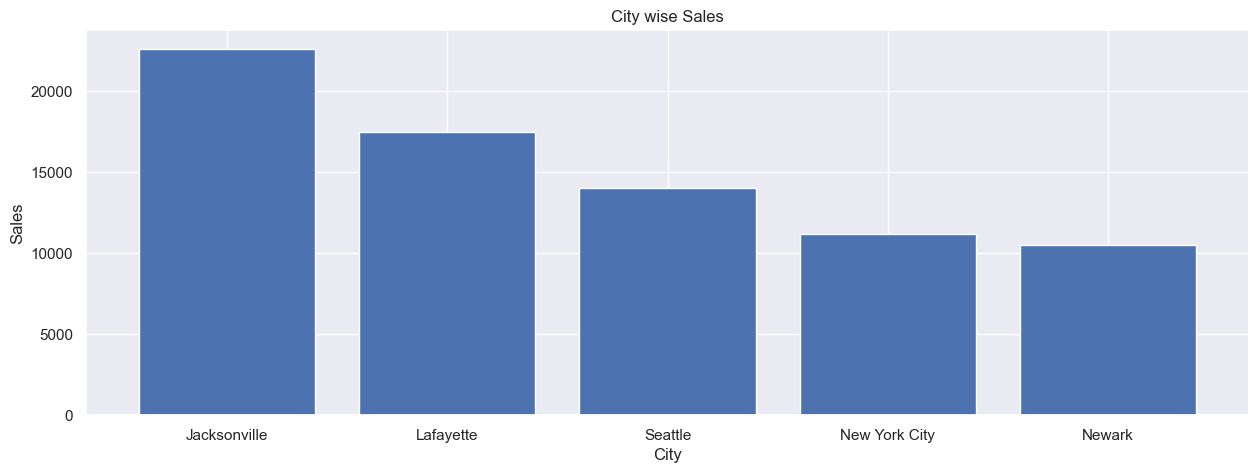

In [17]:
citywisedata=newdata.copy()
citywisedata.sort_values(by='Sales',ascending=False)
citywisedata=citywisedata.head(5)
plt.figure(figsize=(15,5))
plt.bar(citywisedata['City'],citywisedata['Sales'])
plt.title('City wise Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

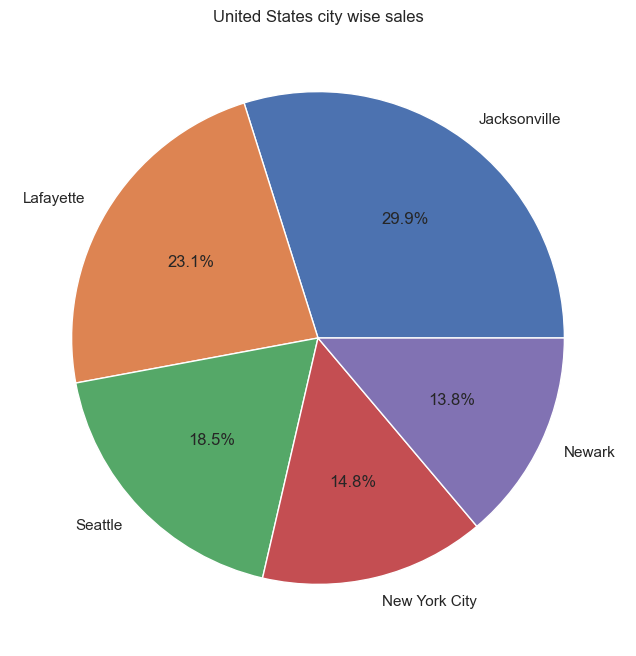

In [18]:
uscitywisedata = newdata.copy()
uscitywisedata = uscitywisedata.sort_values(by='Sales',ascending=False)
uscitywisedata=uscitywisedata.head(5)
plt.figure(figsize=(15,8))
plt.pie(uscitywisedata['Sales'],labels=uscitywisedata['City'],autopct='%1.1f%%')
plt.title('United States city wise sales')
plt.show()

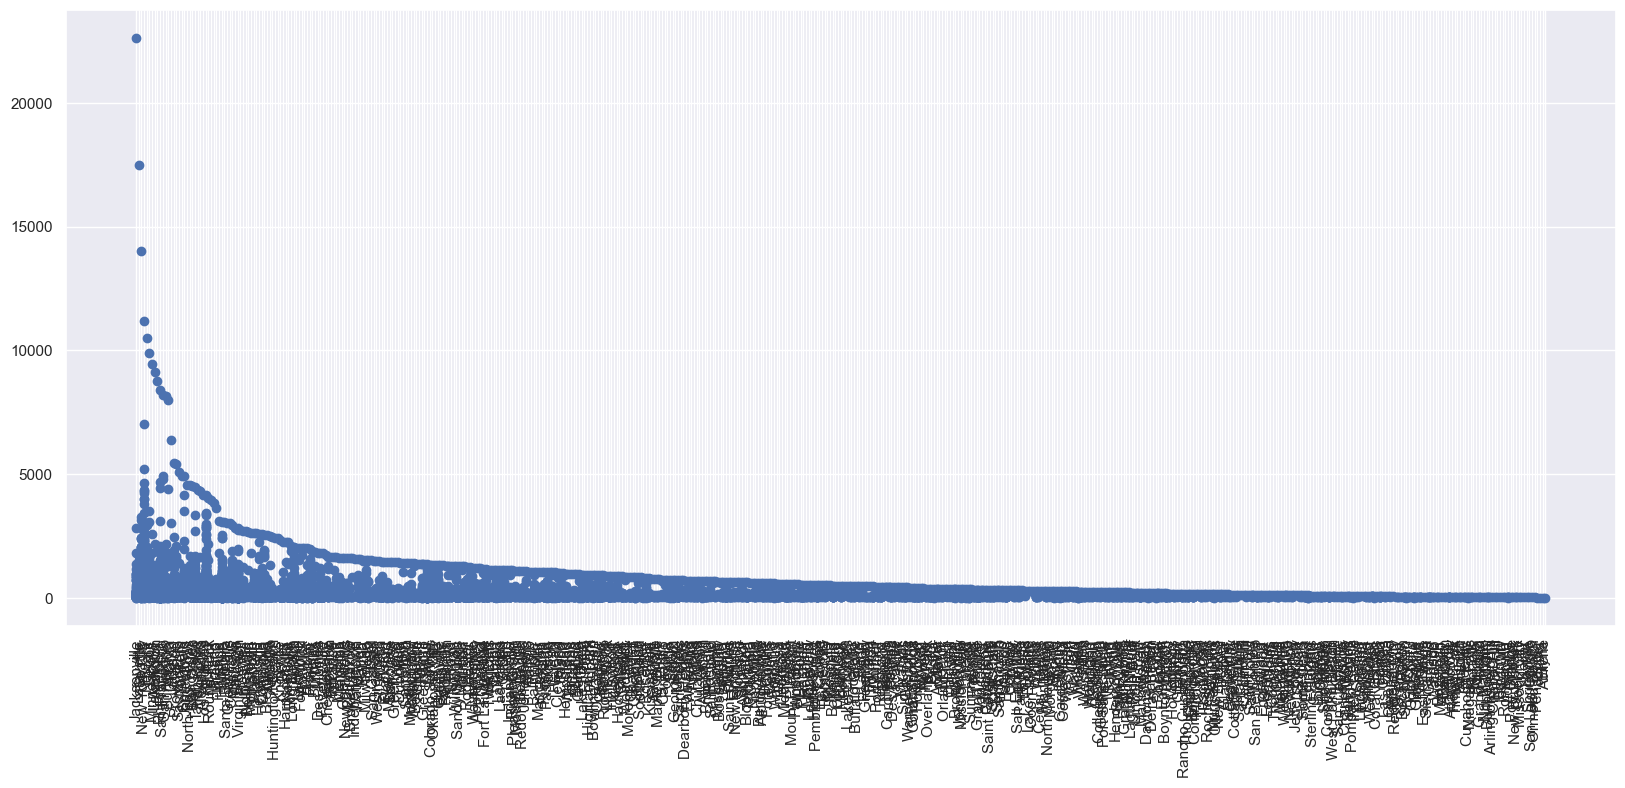

In [19]:
plt.figure(figsize=(20,8))
plt.scatter(newdata['City'],newdata['Sales'])
plt.xticks(rotation=90)
plt.show()

In [20]:
newdata = newdata[newdata['Sales'] < 2500]

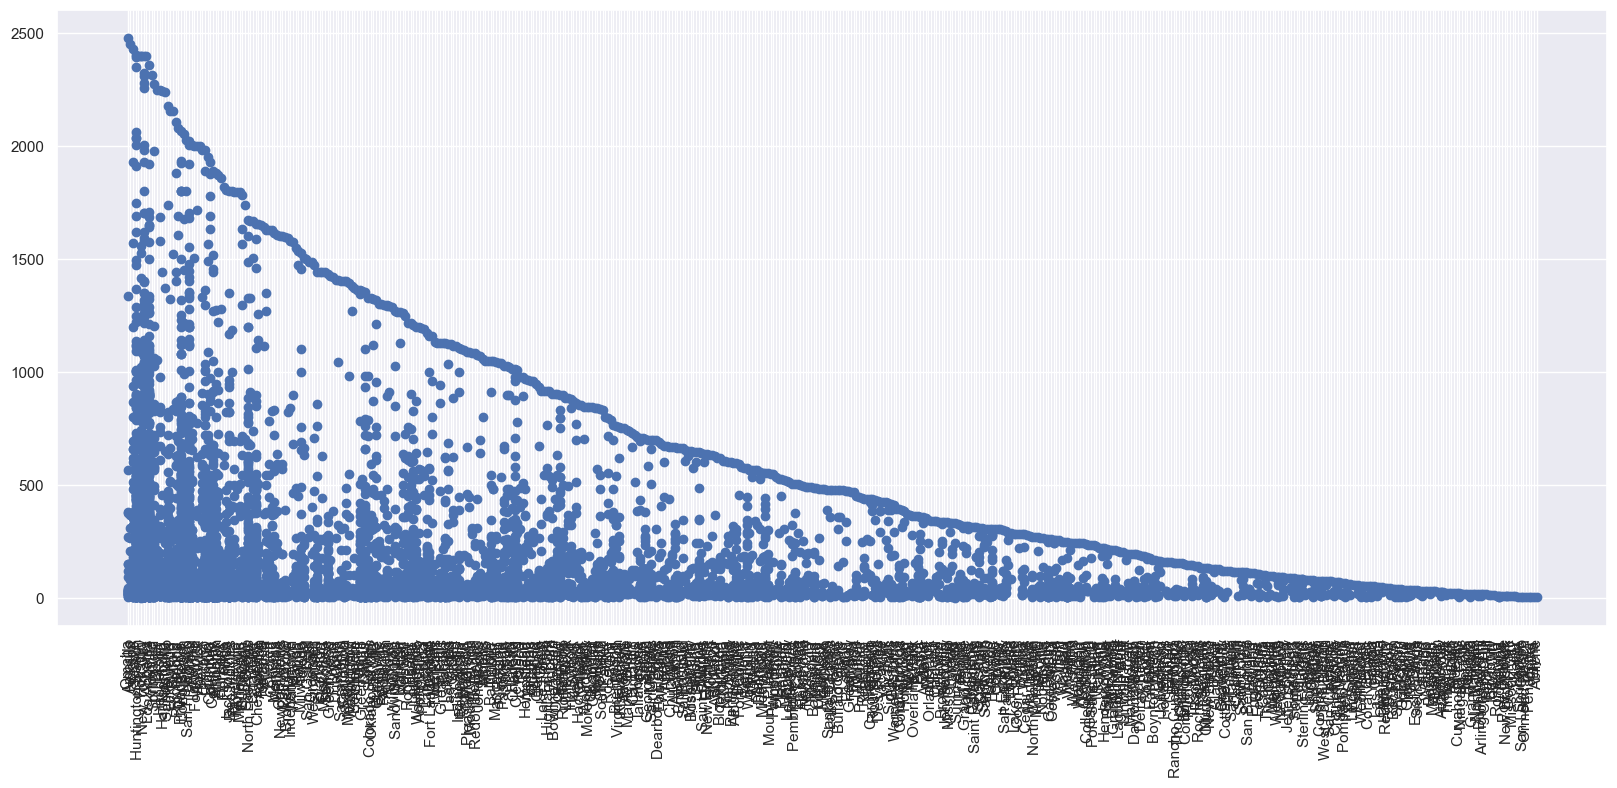

In [21]:
plt.figure(figsize=(20,8))
plt.scatter(newdata['City'],newdata['Sales'])
plt.xticks(rotation=90)
plt.show()

In [22]:
monthlysales = pd.DataFrame(columns=('Month','Sales'))
monthlysales = newdata.groupby('Month Name')['Sales'].sum().reset_index()

# Insert monthly sales data into the DataFrame
for index, row in monthlysales.iterrows():
    monthlysales.loc[index] = [row['Month Name'], row['Sales']]

monthlysales

,Month Name,Sales
0,1,66008.3736
1,2,48079.1854
2,3,123671.2832
3,4,106573.5516
4,5,120960.9917
5,6,128615.5433
6,7,134548.0790
7,8,130147.4710
8,9,245136.7977
9,10,147840.6187


In [23]:
monthlysales['Month Name'] = monthlysales['Month Name'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
monthlysales

,Month Name,Sales
0,Jan,66008.3736
1,Feb,48079.1854
2,Mar,123671.2832
3,Apr,106573.5516
4,May,120960.9917
5,Jun,128615.5433
6,Jul,134548.0790
7,Aug,130147.4710
8,Sept,245136.7977
9,Oct,147840.6187


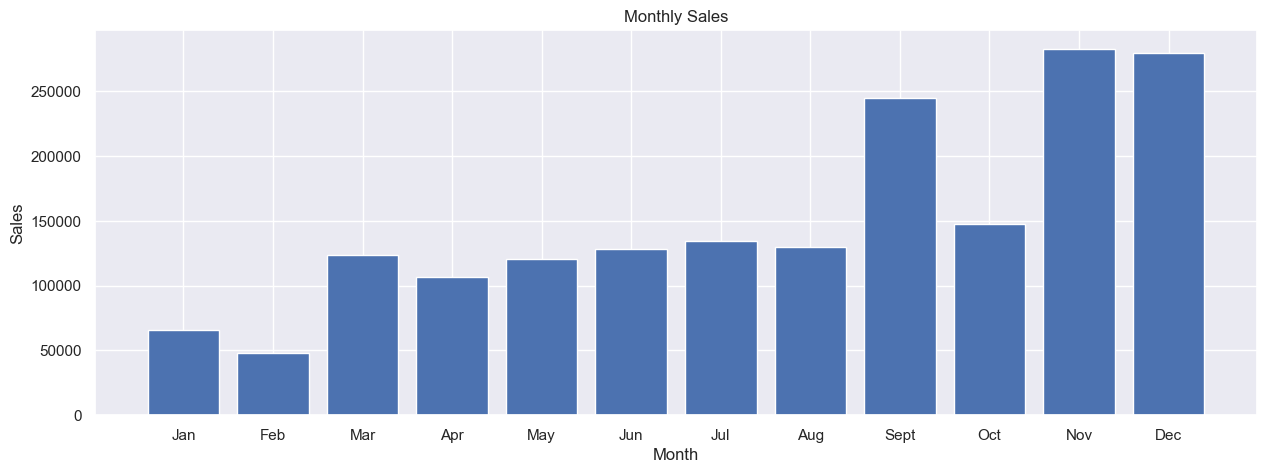

In [24]:
plt.figure(figsize=(15,5))
plt.bar(monthlysales['Month Name'],monthlysales['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

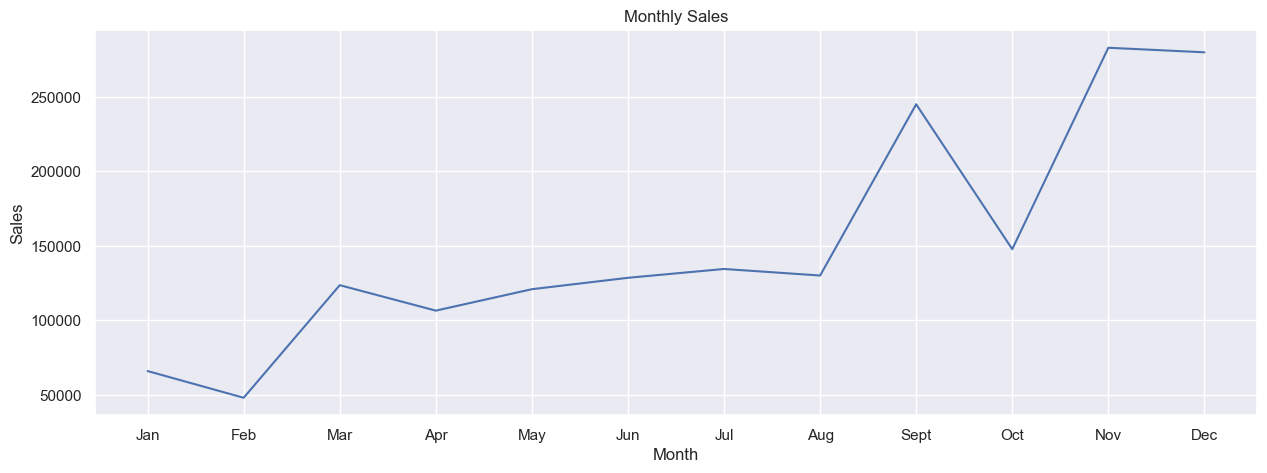

In [25]:
plt.figure(figsize=(15,5))
plt.plot(monthlysales['Month Name'],monthlysales['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [27]:
newdata.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month Name
5530,5531,CA-2018-160885,2018-12-02,06/12/2018,Standard Class,JK-16090,Juliana Krohn,Consumer,United States,Omaha,Nebraska,68104.0,Central,TEC-PH-10001795,Technology,Phones,ClearOne CHATAttach 160 - speaker phone,2479.96,12
1438,1439,CA-2016-139731,2016-10-15,15/10/2016,Same Day,JE-15745,Joel Eaton,Consumer,United States,Amarillo,Texas,79109.0,Central,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.43,10


In [28]:
encodeddata = data[['Ship Mode','Segment','State','Region','Category','Sub-Category','Product Name','Sales','Month Name']]

In [29]:
encodeddata

,Ship Mode,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Month Name
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,Second Class,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,Standard Class,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...
9795,Standard Class,Corporate,Illinois,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,Standard Class,Corporate,Ohio,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January
9797,Standard Class,Corporate,Ohio,East,Technology,Phones,GE 30524EE4,235.1880,January
9798,Standard Class,Corporate,Ohio,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January


In [30]:
lbl = LabelEncoder()
encodeddata[['Ship Mode','Segment','State','Region','Category','Sub-Category','Product Name','Sales','Month Name']] = encodeddata[['Ship Mode','Segment','State','Region','Category','Sub-Category','Product Name','Sales','Month Name']].apply(lambda x:lbl.fit_transform(x))

C:\Users\Admin\AppData\Local\Temp\ipykernel_15932\437096042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encodeddata[['Ship Mode','Segment','State','Region','Category','Sub-Category','Product Name','Sales','Month Name']] = encodeddata[['Ship Mode','Segment','State','Region','Category','Sub-Category','Product Name','Sales','Month Name']].apply(lambda x:lbl.fit_transform(x))


In [31]:
encodeddata

,Ship Mode,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Month Name
0,2,0,15,2,0,4,386,4156,9
1,2,0,15,2,0,5,838,5158,9
2,2,1,3,3,1,10,1432,956,6
3,3,0,8,2,0,16,366,5329,10
4,3,0,8,2,1,14,573,1345,10
...,...,...,...,...,...,...,...,...,...
9795,3,1,11,0,1,3,408,195,8
9796,3,1,33,1,1,2,277,675,4
9797,3,1,33,1,2,13,724,4020,4
9798,3,1,33,1,2,13,148,1506,4


In [32]:
corr_matrix = encodeddata.corr()
corr_matrix

,Ship Mode,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Month Name
Ship Mode,1.000000,-0.004514,0.015145,-0.027498,-0.006233,-0.002852,-0.007238,-0.006483,-0.015510
Segment,-0.004514,1.000000,-0.002536,-0.004896,0.009412,0.011100,0.017844,0.001712,0.003416
State,0.015145,-0.002536,1.000000,-0.441641,0.006852,-0.002889,-0.001225,-0.023690,0.043175
Region,-0.027498,-0.004896,-0.441641,1.000000,-0.003842,0.009276,0.009511,0.041676,-0.027116
Category,-0.006233,0.009412,0.006852,-0.003842,1.000000,-0.073206,0.113875,0.005918,0.002933
Sub-Category,-0.002852,0.011100,-0.002889,0.009276,-0.073206,1.000000,0.114358,0.145630,0.002109
Product Name,-0.007238,0.017844,-0.001225,0.009511,0.113875,0.114358,1.000000,-0.003822,-0.002469
Sales,-0.006483,0.001712,-0.023690,0.041676,0.005918,0.145630,-0.003822,1.000000,-0.007161
Month Name,-0.015510,0.003416,0.043175,-0.027116,0.002933,0.002109,-0.002469,-0.007161,1.000000


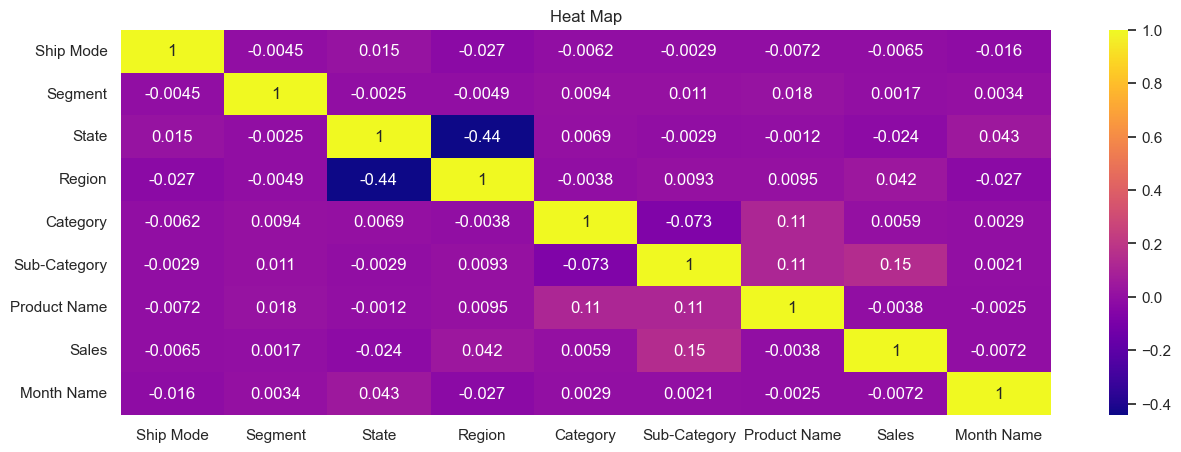

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix,annot=True,cmap='plasma')
plt.title('Heat Map')
plt.show()

In [34]:
y=encodeddata['Sales']
x=encodeddata.drop(columns={'Sales'})

In [35]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
xsclaed = stds.fit_transform(x)

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
model = RandomForestRegressor(n_estimators=1000)

In [39]:
model.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=1000)

In [40]:
prediction = model.predict(xtest)

In [41]:
prediction

array([2913.244     , 1479.759     , 3190.453     , 2511.66      ,
       1407.976     , 2959.792     ,  797.977     , 1446.121     ,
       2951.66233333, 2391.6038    ,  971.103     , 3908.7       ,
       3483.255     , 5065.326     , 3868.39325   , 4666.558     ,
       1234.088     , 4809.484     , 3706.209     , 1033.98      ,
       3962.521     , 3435.662     , 1851.47257143, 5013.524     ,
       4928.776     , 1272.079     , 2529.019     ,  663.861     ,
        845.37      , 3404.6753619 , 1070.068     ,  356.966     ,
       3449.853     , 1102.128     , 1610.583     , 3632.945     ,
       4358.503     , 2829.94      , 1553.22253333, 4417.055     ,
       2278.967     ,  843.40983333, 2174.862     , 4992.57433333,
       3781.463     , 1552.833     , 1422.8988    , 4152.233     ,
       4124.9542    , 1499.179     , 4939.995     , 4719.93605714,
       3086.954     , 1667.343     ,  639.10825   , 1152.96      ,
       1000.062     , 5010.627     , 2537.277     , 4852.415  

In [42]:
r2 = r2_score(ytest,prediction)
r2

0.7504585860265122

In [43]:
mae = mean_absolute_error(ytest,prediction)
print('The Mean absolute error is :-->',mae)

The Mean absolute error is :--> 671.4786083803045


In [44]:
mse = mean_squared_error(ytest,prediction)
print('The mean squared error is :-->',mse)

The mean squared error is :--> 688446.6378377493


In [45]:
actual_predicted=pd.DataFrame({'Actual Price':ytest,'Predicted Price':prediction})
actual_predicted.head()

,Actual Price,Predicted Price
532,2210,2913.244
872,749,1479.759
1149,720,3190.453
2287,1111,2511.660
4038,1285,1407.976


In [46]:
actual_predicted['error'] = actual_predicted['Predicted Price'] - actual_predicted['Actual Price']
actual_predicted.head(20)

,Actual Price,Predicted Price,error
532,2210,2913.244000,703.244000
872,749,1479.759000,730.759000
1149,720,3190.453000,2470.453000
2287,1111,2511.660000,1400.660000
4038,1285,1407.976000,122.976000
1726,2951,2959.792000,8.792000
4989,414,797.977000,383.977000
4228,1350,1446.121000,96.121000
6664,4105,2951.662333,-1153.337667
7598,1943,2391.603800,448.603800


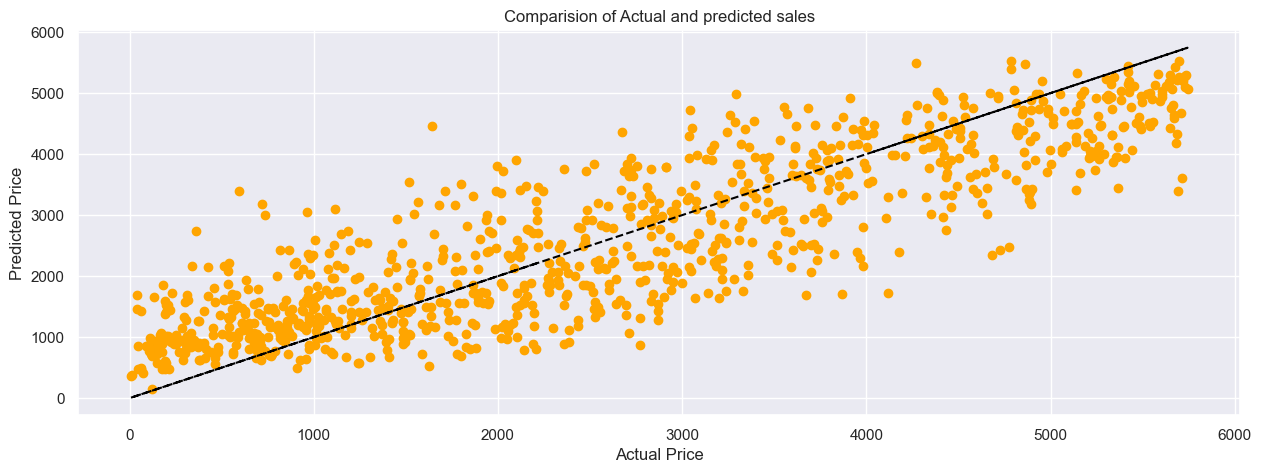

In [47]:
plt.figure(figsize=(15,5))
plt.scatter(actual_predicted['Actual Price'],actual_predicted['Predicted Price'],color='orange')
plt.plot(actual_predicted['Actual Price'],actual_predicted['Actual Price'],color='black',linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparision of Actual and predicted sales')
plt.grid(True)
plt.show()